In [39]:
# Import necessary libraries
import pandas as pd

In [40]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng.csv'
df1 = pd.read_csv(csv_file)
df1.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [41]:
# Data Exploratory and Wrangling
df1.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df1.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [42]:
# Checking columns data type. report_date column should using datetime data type for Visualization.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case_no                           10010 non-null  int64  
 1   report_date                       10010 non-null  object 
 2   date_of_onset                     10010 non-null  object 
 3   gender                            10010 non-null  object 
 4   age                               10010 non-null  int64  
 5   name_of_hospital_admitted         0 non-null      float64
 6   hospitalised_discharged_deceased  10010 non-null  object 
 7   hk_nonhk_resident                 10010 non-null  object 
 8   case_classification               10010 non-null  object 
 9   confirmed_probable                10010 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 782.2+ KB


In [43]:
# Chanage report_date column to datetime data type
df1['report_date'] = pd.to_datetime(df1['report_date'], format='%d/%m/%Y')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           10010 non-null  int64         
 1   report_date                       10010 non-null  datetime64[ns]
 2   date_of_onset                     10010 non-null  object        
 3   gender                            10010 non-null  object        
 4   age                               10010 non-null  int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  10010 non-null  object        
 7   hk_nonhk_resident                 10010 non-null  object        
 8   case_classification               10010 non-null  object        
 9   confirmed_probable                10010 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), ob

In [44]:
# Data Exploratory & Wrangling. Check data quality in hk_nonhk_resident column. 
# There are case sensitive issue in this column of data. 
df1.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident          42
HK resident        9621
Non-HK Resident       7
Non-HK resident     340
Name: hk_nonhk_resident, dtype: int64

In [45]:
# Patch data to address case sensitive issue.
df1['hk_nonhk_resident'] = df1['hk_nonhk_resident'].str.replace('HK resident','HK Resident')
df1['hk_nonhk_resident'] = df1['hk_nonhk_resident'].str.replace('Non-HK resident','Non-HK Resident')
df1.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident        9663
Non-HK Resident     347
Name: hk_nonhk_resident, dtype: int64

In [46]:
# Data Exploratory and Analysis. Group by report_date & gender to count number of cases.
df1.groupby(["report_date", "gender"])["report_date"].count()

report_date  gender
2020-01-23   M          2
2020-01-24   F          2
             M          1
2020-01-26   F          1
             M          2
                       ..
2021-01-21   M         38
2021-01-22   F         28
             M         33
2021-01-23   F         45
             M         36
Name: report_date, Length: 610, dtype: int64

Text(0, 0.5, 'Number of Cases')

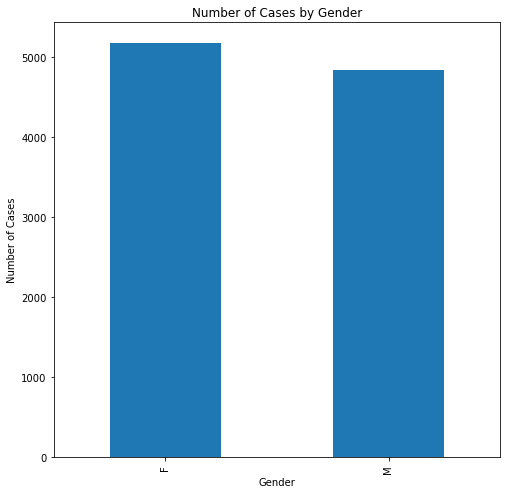

In [48]:
# Data Exploratory and Visualization. Group by gender and count number of cases and then present 
# in bar chart.
pandaplot = df1.groupby(['gender']).size().plot.bar(figsize=(8,8))
pandaplot.set_title("Number of Cases by Gender")
pandaplot.set_xlabel("Gender")
pandaplot.set_ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

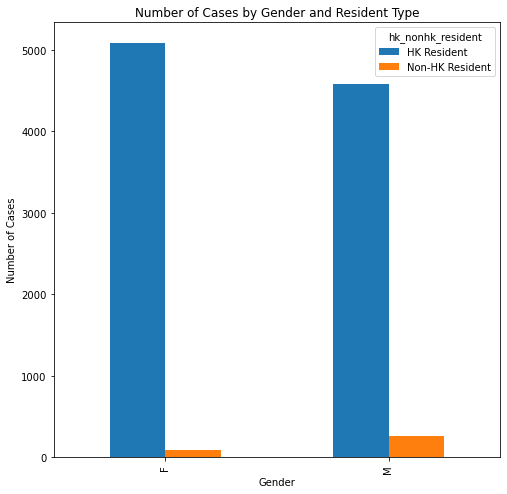

In [49]:
# Data Exploratory and Visualization. Group by gender & hk_nonhk_resident and count number of cases 
# and then present in bar chart.
pandaplot = pd.crosstab(df1['gender'],df1['hk_nonhk_resident']).plot.bar(figsize=(8,8))
pandaplot.set_title("Number of Cases by Gender and Resident Type")
pandaplot.set_xlabel("Gender")
pandaplot.set_ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

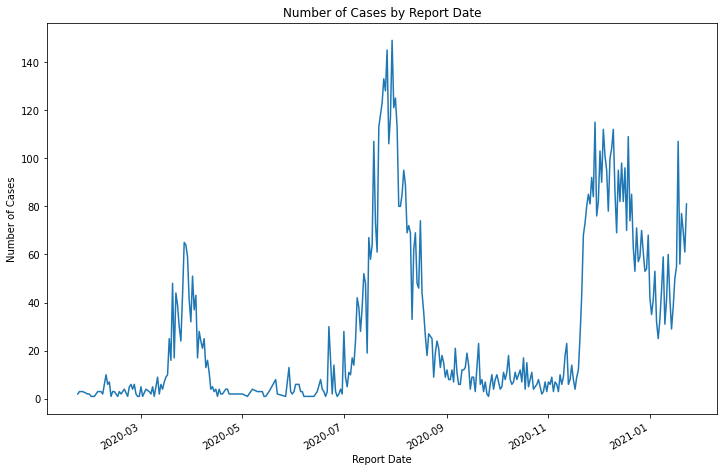

In [50]:
# Data Exploratory and Visualization. Group by report_data & cases count and then present in time series
# line chart.
pandaplot = df1.groupby(['report_date']).size().plot.line(figsize=(12,8))
pandaplot.set_title("Number of Cases by Report Date")
pandaplot.set_xlabel("Report Date")
pandaplot.set_ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

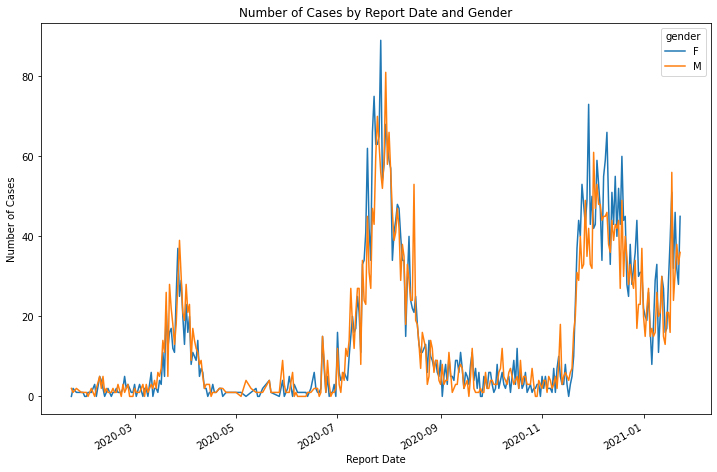

In [51]:
# Data Exploratory and Visualization. Group by report_data & gender & cases count and then present in 
# time series line chart.
pandaplot = pd.crosstab(df1['report_date'],df1['gender']).plot.line(figsize=(12,8))
pandaplot.set_title("Number of Cases by Report Date and Gender")
pandaplot.set_xlabel("Report Date")
pandaplot.set_ylabel("Number of Cases")


In [13]:
# Data Exploratory & Wrangling. Explore the column case_classification.
df1.groupby(["case_classification"])["case_classification"].count()

case_classification
Epidemiologically linked with imported case            41
Epidemiologically linked with local case             5162
Epidemiologically linked with possibly local case      62
Imported case                                        1893
Local case                                           2749
Possibly local case                                   103
Name: case_classification, dtype: int64

Text(0, 0.5, 'Number of Cases')

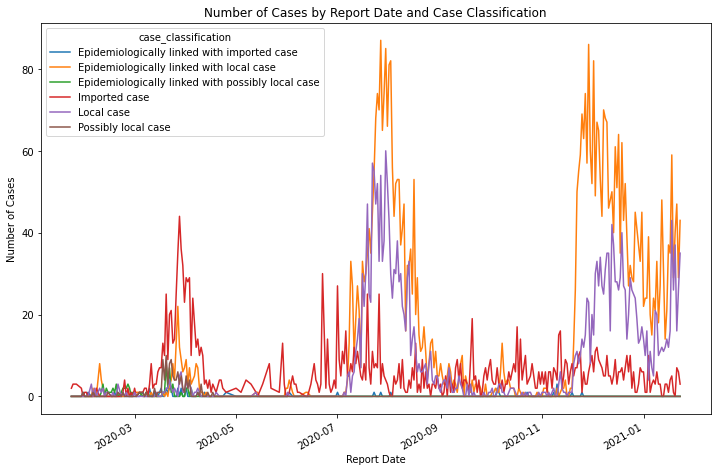

In [52]:
# Data Exploratory and Visualization. Group by report_data & case_classification & cases count and then 
# present in time series line chart.
pandaplot = pd.crosstab(df1['report_date'],df1['case_classification']).plot.line(figsize=(12,8))
pandaplot.set_title("Number of Cases by Report Date and Case Classification")
pandaplot.set_xlabel("Report Date")
pandaplot.set_ylabel("Number of Cases")

In [53]:
# Read source data "Latest situation of reported cases of COVID-19 in Hong Kong (English)".
csv_file = './data/latest_situation_of_reported_cases_covid_19_eng.csv'
df2 = pd.read_csv(csv_file)
df2.head()

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition
0,08/01/2020,12:00,0,21.0,17.0,38.0,0,0,0,NaN
1,09/01/2020,12:00,0,25.0,23.0,48.0,0,0,0,NaN
2,10/01/2020,12:00,0,31.0,23.0,54.0,0,0,0,NaN
3,11/01/2020,12:00,0,46.0,15.0,61.0,0,0,0,NaN
4,12/01/2020,12:00,0,51.0,16.0,67.0,0,0,0,NaN


In [54]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# Data Exploratory and Wrangling
df2.columns = ['as_of_date','as_of_time','num_of_confirmed_cases','num_of_ruled_out_cases',
               'num_of_cases_still_hospitalised_for_investigation',
               'num_of_cases_fullfulling_the_reporting_criteria','num_of_death_cases','num_of_discharge_cases',
               'num_of_probable_cases','num_of_hospitalised_cases_in_critical_condition']
df2.head()

,as_of_date,as_of_time,num_of_confirmed_cases,num_of_ruled_out_cases,num_of_cases_still_hospitalised_for_investigation,num_of_cases_fullfulling_the_reporting_criteria,num_of_death_cases,num_of_discharge_cases,num_of_probable_cases,num_of_hospitalised_cases_in_critical_condition
0,08/01/2020,12:00,0,21.0,17.0,38.0,0,0,0,NaN
1,09/01/2020,12:00,0,25.0,23.0,48.0,0,0,0,NaN
2,10/01/2020,12:00,0,31.0,23.0,54.0,0,0,0,NaN
3,11/01/2020,12:00,0,46.0,15.0,61.0,0,0,0,NaN
4,12/01/2020,12:00,0,51.0,16.0,67.0,0,0,0,NaN


In [56]:
# Checking columns data type. report_date column should using datetime data type for Visualization.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   as_of_date                                         382 non-null    object 
 1   as_of_time                                         194 non-null    object 
 2   num_of_confirmed_cases                             382 non-null    int64  
 3   num_of_ruled_out_cases                             89 non-null     float64
 4   num_of_cases_still_hospitalised_for_investigation  89 non-null     float64
 5   num_of_cases_fullfulling_the_reporting_criteria    89 non-null     float64
 6   num_of_death_cases                                 382 non-null    int64  
 7   num_of_discharge_cases                             382 non-null    int64  
 8   num_of_probable_cases                              382 non-null    int64  
 9   num_of_hos

In [57]:
# Chanage report_date column to datetime data type
df2['as_of_date'] = pd.to_datetime(df2['as_of_date'], format='%d/%m/%Y')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   as_of_date                                         382 non-null    datetime64[ns]
 1   as_of_time                                         194 non-null    object        
 2   num_of_confirmed_cases                             382 non-null    int64         
 3   num_of_ruled_out_cases                             89 non-null     float64       
 4   num_of_cases_still_hospitalised_for_investigation  89 non-null     float64       
 5   num_of_cases_fullfulling_the_reporting_criteria    89 non-null     float64       
 6   num_of_death_cases                                 382 non-null    int64         
 7   num_of_discharge_cases                             382 non-null    int64         
 8   num_of_probable_case

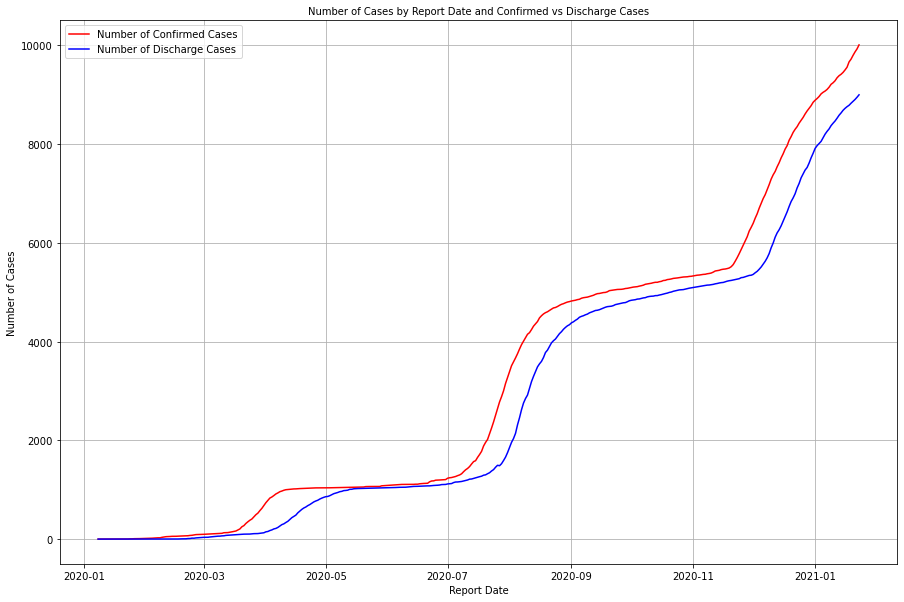

In [59]:
# Data Exploratory and Visualization. Group of num_of_confirmed_cases & num_of_discharge_cases & cases count 
# and then present in time series line chart.
plt.figure(figsize=(15,10))
plt.plot(df2.as_of_date, df2.num_of_confirmed_cases, color='red')
plt.plot(df2.as_of_date, df2.num_of_discharge_cases, color='blue')
plt.title('Number of Cases by Report Date and Confirmed vs Discharge Cases', fontsize=10)
plt.legend(['Number of Confirmed Cases', 'Number of Discharge Cases'], loc='upper left')
plt.xlabel('Report Date', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
plt.grid(True)
plt.show()

In [1]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng.csv'
df3 = pd.read_csv(csv_file)
df3.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [3]:
# Data Exploratory and Wrangling
df3.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df3.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [4]:
# Chanage report_date column to datetime data type
df3['report_date'] = pd.to_datetime(df3['report_date'], format='%d/%m/%Y')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           10010 non-null  int64         
 1   report_date                       10010 non-null  datetime64[ns]
 2   date_of_onset                     10010 non-null  object        
 3   gender                            10010 non-null  object        
 4   age                               10010 non-null  int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  10010 non-null  object        
 7   hk_nonhk_resident                 10010 non-null  object        
 8   case_classification               10010 non-null  object        
 9   confirmed_probable                10010 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), ob

In [5]:
# Duplicate report_date column to report_date_delta which is count down from day 0 to latest as we are 
# required to feed numeric value (float) to seaborn.
df3['report_date_delta'] = (df3['report_date'] - df3['report_date'].min())  / np.timedelta64(1,'D')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           10010 non-null  int64         
 1   report_date                       10010 non-null  datetime64[ns]
 2   date_of_onset                     10010 non-null  object        
 3   gender                            10010 non-null  object        
 4   age                               10010 non-null  int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  10010 non-null  object        
 7   hk_nonhk_resident                 10010 non-null  object        
 8   case_classification               10010 non-null  object        
 9   confirmed_probable                10010 non-null  object        
 10  report_date_delta                 10010 non-nu

In [6]:
# Quick look into numeric value of report_date_delta. More or less, you can call it factorization.
df3.groupby(["report_date_delta"])["report_date_delta"].count()

report_date_delta
0.0       2
1.0       3
3.0       3
6.0       2
7.0       2
         ..
362.0    56
363.0    77
364.0    70
365.0    61
366.0    81
Name: report_date_delta, Length: 327, dtype: int64

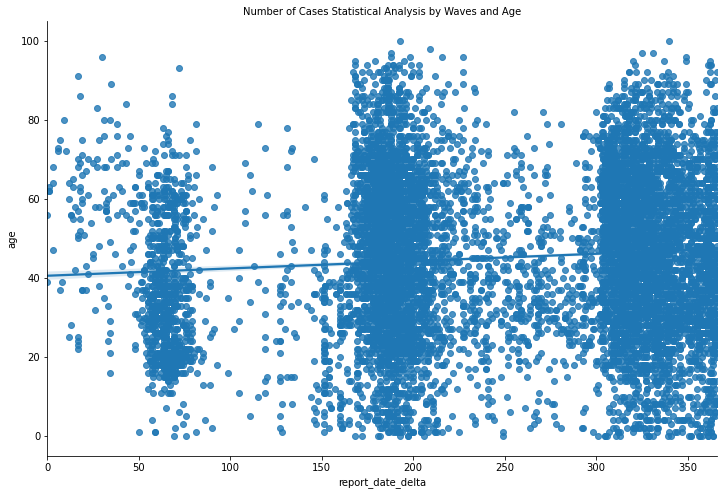

In [11]:
# Data Exploratory & Visualization. Plotting report_date_delta & age columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Number of Cases Statistical Analysis by Waves and Age', fontsize=10)
sns.regplot(x='report_date_delta', y= 'age', data=df3)
sns.despine()

In [60]:
# Data Analysis from Visualization.
# * There are 4 waves of COVID-19 in Hong Kong.
# * Wave 3 is obviously more serious than wave 2, and wave 3 is more less simliar as currently ware 4.
# * Seem have pattern around 100 days for each of the wave.
# * From wave 2 to 3, although the cases is trending down from end of ware 2. But, as long as still have low
# numbers of cases, it would make big impact in next wave.
# * From wave 3 to 4, similar as wave 2 to 3, cases is trending down, lower numbers of case, but it still 
# much more than number than previously wave gap. From wave 1 to 2 gap experience, it would make bigger
# result/impact in next wave (currently), hopefully not, god bless Hong Kong.
# * You can figure out the infacted peoples age is from originally around 40 and see trend is rising up recently.

In [12]:
# Data Exploratory & Wrangling. Check data quality in hk_nonhk_resident column. There are case sensitive issue in this column of data. 
df3.groupby(["case_classification"])["case_classification"].count()

case_classification
Epidemiologically linked with imported case            41
Epidemiologically linked with local case             5162
Epidemiologically linked with possibly local case      62
Imported case                                        1893
Local case                                           2749
Possibly local case                                   103
Name: case_classification, dtype: int64

In [13]:
# Duplicate case_classification to case_classification_float which trying to patch data to numeric values 
# by manually string value replacement and change column type to float. 
df3['case_classification_float'] = df3['case_classification']
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Epidemiologically linked with imported case','0')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Epidemiologically linked with local case','1')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Epidemiologically linked with possibly local case','2')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Imported case','3')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Local case','4')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Possibly local case','5')
df3['case_classification_float'] = df3['case_classification_float'].astype(float)
df3.groupby(["case_classification_float"])["case_classification_float"].count()

case_classification_float
0.0      41
1.0    5162
2.0      62
3.0    1893
4.0    2749
5.0     103
Name: case_classification_float, dtype: int64

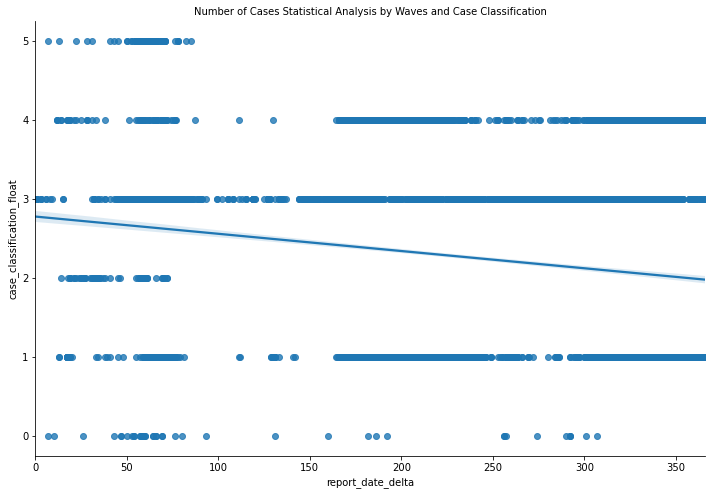

In [22]:
# Data Exploratory & Visualization. Plotting report_date_delta & case_classification_float columns 
# relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Number of Cases Statistical Analysis by Waves and Case Classification', fontsize=10)
sns.regplot(x='report_date_delta', y= 'case_classification_float', data=df3)
sns.despine()

In [23]:
# Data Analysis from Visualization.
# * COVID-19 cases is orgionally from 'Imported Case' (3) and trending down to 
# 'Epidemiologically linked with possibly local case' (2).
# Trend down line from (3) to (2) also mean cases is coming from imported to local cases.
# 'Imported Case' (3) is never been stopped, and it would potentially turning more local cases.

In [24]:
# Data Exploratory & Wrangling. Check data quality in hk_nonhk_resident column. 
# There are case sensitive issue in this column of data. 
df3.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident          42
HK resident        9621
Non-HK Resident       7
Non-HK resident     340
Name: hk_nonhk_resident, dtype: int64

In [25]:
# Patch data to address case sensitive issue.
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident']
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].str.replace('HK resident','HK Resident')
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].str.replace('Non-HK resident','Non-HK Resident')
#df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].replace('-', '', regex=True)
df3.groupby(["hk_nonhk_resident_float"])["hk_nonhk_resident_float"].count()

hk_nonhk_resident_float
HK Resident        9663
Non-HK Resident     347
Name: hk_nonhk_resident_float, dtype: int64

In [26]:
# Instead of manually patching string values in column. Using panda factorize function to make string 
# into numeric values.
stacked = df3[['hk_nonhk_resident_float']].stack()
df3[['hk_nonhk_resident_float']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].astype(float)
df3.groupby(["hk_nonhk_resident_float"])["hk_nonhk_resident_float"].count()

hk_nonhk_resident_float
0.0     347
1.0    9663
Name: hk_nonhk_resident_float, dtype: int64

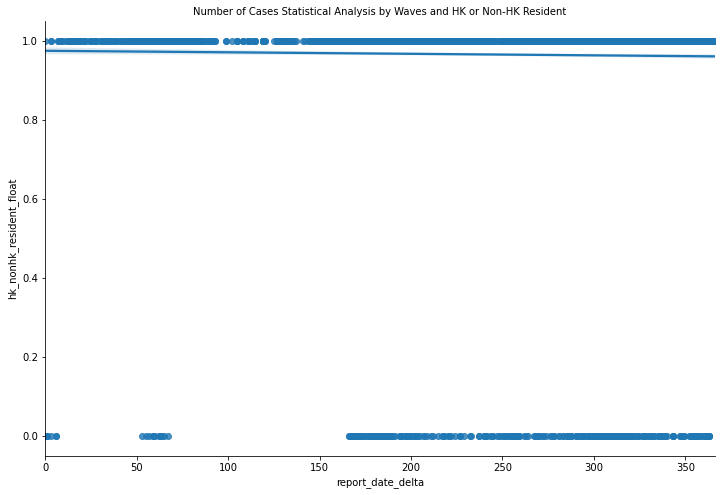

In [28]:
# Data Exploratory & Visualization. Plotting report_date_delta & hk_nonhk_resident columns. 
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Number of Cases Statistical Analysis by Waves and HK or Non-HK Resident', fontsize=10)
sns.regplot(x='report_date_delta', y= 'hk_nonhk_resident_float', data=df3)
sns.despine()

In [29]:
# Data Analysis from Visualization.
# * Infacted case of 'HK Resident' (1) is from time to time.
# * With previously analysis, cases is trending from imported. Cross reference with this chart, seem 
# the imported cases is not from foreigner, they are HK Resident.
# * Around 200 days ago, there are 'Non-HK Resident' (0) cases coming up and until latest. That's similar 
# raising moment of wave 3.

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import datetime

In [31]:
# Read source data "Residential buildings in which probable/confirmed cases have resided in the past 14 days 
# or non-residential building with 2 or more probable/confirmed cases in the past 14 days (English)".
csv_file = './data/building_list_eng.csv'
df4 = pd.read_csv(csv_file)
df4.head()

,District,Building name,Last date of residence of the case(s),Related probable/confirmed cases
0,Tai Po,"Block 10, Serenity Park",NaN,9154
1,Tuen Mun,"Civic House, Affluence Garden",NaN,9155
2,Tuen Mun,"Civic House, Affluence Garden",NaN,9156
3,Tuen Mun,"Pacific House, Affluence Garden",NaN,9157
4,Sha Tin,"Tower 5, Festival City II",NaN,9161


In [32]:
# Data Exploratory and Wrangling
df4.columns = ['district','building_name','last_date_of_residence_of_the_case','related_probable_confirmed_cases']
df4.head()

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases
0,Tai Po,"Block 10, Serenity Park",NaN,9154
1,Tuen Mun,"Civic House, Affluence Garden",NaN,9155
2,Tuen Mun,"Civic House, Affluence Garden",NaN,9156
3,Tuen Mun,"Pacific House, Affluence Garden",NaN,9157
4,Sha Tin,"Tower 5, Festival City II",NaN,9161


In [33]:
# Seem there are null value in last_date_of_residence_of_the_case column, let have a quick check.
len(df4) - df4.count()

district                                0
building_name                           0
last_date_of_residence_of_the_case    797
related_probable_confirmed_cases        0
dtype: int64

In [34]:
# Chanage last_date_of_residence_of_the_case column to datetime data type
df4['last_date_of_residence_of_the_case'] = pd.to_datetime(df4['last_date_of_residence_of_the_case'], format='%d/%m/%Y')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   district                            1143 non-null   object        
 1   building_name                       1143 non-null   object        
 2   last_date_of_residence_of_the_case  346 non-null    datetime64[ns]
 3   related_probable_confirmed_cases    1143 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 35.8+ KB


In [35]:
# Check related_probable_confirmed_cases column can be covert data type as numeric or not. This is important 
# for coming tables join view.
df4[pd.to_numeric(df4.related_probable_confirmed_cases, errors='coerce').isnull()]

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases
797,Tuen Mun,San Hui Market (non-residential),2020-12-26,"7073, 7550, 8527, 8805"
798,Kwun Tong,Tak Tin Plaza (non-residential),2020-12-26,"7285, 7398, 8650"
799,Yau Tsim Mong,Wing On Kowloon Centre (non-residential),2020-12-26,"8028, 8521, 8595"
800,Kwun Tong,Shun Lee Shopping Centre (non-residential),2020-12-26,"8169, 8808"
801,Sai Kung,PopCorn (non-residential),2020-12-26,"8581, 8605"
...,...,...,...,...
1092,Eastern,EAST Hong Kong (non-residential),2021-01-19,"9698, 9948"
1100,Yau Tsim Mong,27 Pitt Street 勝利超級魚丸 (non-residential),2021-01-19,"9777, 9778"
1104,Yau Tsim Mong,S.B. Commercial Building (non-residential),2021-01-19,"9837, 9935"
1117,Yau Tsim Mong,G/F Kam Wah Building (non-residential),2021-01-20,"9732, 9850"


In [36]:
# As expected, very bad situation, there are muliple number in related_probable_confirmed_cases column and separate 
# case number with comma.

In [37]:
# Transform related_probable_confirmed_cases column data (case number with comma) into multiple rows.

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = df4['related_probable_confirmed_cases'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
df4a = pd.DataFrame({'district': np.repeat(df4['district'], lens),
                    'building_name': np.repeat(df4['building_name'], lens),
                    'last_date_of_residence_of_the_case': np.repeat(df4['last_date_of_residence_of_the_case'], lens),
                    'related_probable_confirmed_cases': chainer(df4['related_probable_confirmed_cases'])})

In [38]:
# Check related_probable_confirmed_cases column can be covert data type as numeric or not again.
df4a[pd.to_numeric(df4a.related_probable_confirmed_cases, errors='coerce').isnull()]

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases


In [39]:
# Convert related_probable_confirmed_cases column as numeric data type. That is important for coming tables join view.
df4a[['related_probable_confirmed_cases']] = df4a[['related_probable_confirmed_cases']].apply(pd.to_numeric)
df4a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 1142
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   district                            1423 non-null   object        
 1   building_name                       1423 non-null   object        
 2   last_date_of_residence_of_the_case  626 non-null    datetime64[ns]
 3   related_probable_confirmed_cases    1423 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 55.6+ KB


In [40]:
# Data Exploratory and Analysis. Group by district to count number of cases.
df4.groupby(["district"])["district"].count()

district
Central & Western     37
Eastern               77
Islands               17
Kowloon City         100
Kowloon city           1
Kwai Tsing            67
Kwun Tong             69
North                 17
Sai Kung              26
Sha Tin               36
Sham Shui Po          58
Southern              14
Tai Po                10
Tsuen Wan             42
Tsuen wan              1
Tuen Mun              33
Wan Chai              33
Wong Tai Sin          34
Yau Tsim Mong        384
Yuen Long             87
Name: district, dtype: int64

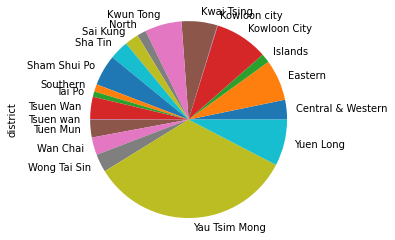

In [46]:
# Data Exploratory and Visualization. Group by district & cases count and then present in pie chart.
df4.district.groupby(df4.district).count().plot(kind='pie')
plt.axis('equal')
plt.show()

In [64]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng.csv'
df5 = pd.read_csv(csv_file)
df5.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [65]:
# Data Exploratory and Wrangling
df5.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df5.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [66]:
# Chanage report_date column to datetime data type
df5['report_date'] = pd.to_datetime(df5['report_date'], format='%d/%m/%Y')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           10010 non-null  int64         
 1   report_date                       10010 non-null  datetime64[ns]
 2   date_of_onset                     10010 non-null  object        
 3   gender                            10010 non-null  object        
 4   age                               10010 non-null  int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  10010 non-null  object        
 7   hk_nonhk_resident                 10010 non-null  object        
 8   case_classification               10010 non-null  object        
 9   confirmed_probable                10010 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), ob

In [67]:
# Patch data to address case sensitive issue.
df5['hk_nonhk_resident'] = df5['hk_nonhk_resident'].str.replace('HK resident','HK Resident')
df5['hk_nonhk_resident'] = df5['hk_nonhk_resident'].str.replace('Non-HK resident','Non-HK Resident')
df5.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident        9663
Non-HK Resident     347
Name: hk_nonhk_resident, dtype: int64

In [68]:
# Join 2 table as combined view. df4a only have four columns district, building_name,
# last_date_of_residence_of_the_case, related_probable_confirmed_cases, it does not have case details.
# Case details information is under df5. Their common reference-able value is case number.
df4a_df5_inner = pd.merge(left=df4a, right=df5, left_on='related_probable_confirmed_cases', right_on='case_no')
df4a_df5_inner.shape
df4a_df5_inner

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,Tai Po,"Block 10, Serenity Park",NaT,9154,9154,2021-01-09,07/01/2021,F,25,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
1,Tuen Mun,"Civic House, Affluence Garden",NaT,9155,9155,2021-01-09,Asymptomatic,F,69,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
2,Tuen Mun,"Civic House, Affluence Garden",NaT,9156,9156,2021-01-09,Asymptomatic,M,68,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
3,Tuen Mun,"Pacific House, Affluence Garden",NaT,9157,9157,2021-01-09,07/01/2021,F,19,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
4,Sha Tin,"Tower 5, Festival City II",NaT,9161,9161,2021-01-09,31/12/2020,F,72,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,Yau Tsim Mong,Yau Ma Tei Market (non-residential),2021-01-16,8881,8881,2021-01-01,27/12/2020,F,49,NaN,Discharged,HK Resident,Local case,Confirmed
1419,Yau Tsim Mong,Argyle Centre (non-residential),2021-01-17,8063,8063,2020-12-19,10/12/2020,F,22,NaN,Discharged,HK Resident,Local case,Confirmed
1420,Yau Tsim Mong,Argyle Centre (non-residential),2021-01-17,8467,8467,2020-12-25,23/12/2020,F,18,NaN,Discharged,HK Resident,Local case,Confirmed
1421,Yau Tsim Mong,Argyle Centre (non-residential),2021-01-17,8917,8917,2021-01-02,01/01/2021,F,29,NaN,Discharged,HK Resident,Local case,Confirmed


In [69]:
# Filer district column and only showing 'Tai Po' district.
tai_po = df4a_df5_inner[df4a_df5_inner['district']=='Tai Po']
tai_po.shape
tai_po

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,Tai Po,"Block 10, Serenity Park",NaT,9154,9154,2021-01-09,07/01/2021,F,25,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
179,Tai Po,"Kwong Yan House, Kwong Fuk Estate",NaT,9313,9313,2021-01-12,10/01/2021,M,48,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
180,Tai Po,Shin Kwan House Fu Shin Estate (non-residential),2021-01-10,9313,9313,2021-01-12,10/01/2021,M,48,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
181,Tai Po,Kwong Fuk Commercial Centre (non-residential),2021-01-11,9313,9313,2021-01-12,10/01/2021,M,48,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
430,Tai Po,Kam Shan Tsuen,NaT,9496,9496,2021-01-16,13/01/2021,F,45,NaN,Hospitalised,HK Resident,Local case,Confirmed
570,Tai Po,Kam Shan Tsuen,NaT,9583,9583,2021-01-18,17/01/2021,M,59,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
731,Tai Po,"Block 2, Uptown Plaza",NaT,9691,9691,2021-01-19,15/01/2021,M,31,NaN,Hospitalised,HK Resident,Local case,Confirmed
785,Tai Po,"Block 6, Parc Versailles",NaT,9729,9729,2021-01-20,17/01/2021,F,52,NaN,Hospitalised,HK Resident,Local case,Confirmed
877,Tai Po,"Yee Leung House, Yee Nga Court",NaT,9794,9794,2021-01-20,13/01/2021,F,22,NaN,Hospitalised,HK Resident,Local case,Confirmed
984,Tai Po,"Block 6, Parc Versailles",NaT,9875,9875,2021-01-22,Asymptomatic,M,58,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed


In [70]:
# As df4a is "Residential buildings in which probable/confirmed cases have resided in the past 14 days 
# or non-residential building with 2 or more probable/confirmed cases in the past 14 days (English)", that's mean 
# only contain past 14 days of data, not all from day 0. But df5 is "Details of probable/confirmed cases of 
# COVID-19 infection in Hong Kong (English)", it included all cases number details from day 0.
# So, let's filter past 14 days of data and make new datafame.
tai_po_14 = tai_po[tai_po.report_date > datetime.datetime.now() - pd.to_timedelta("14day")]
tai_po_14

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
179,Tai Po,"Kwong Yan House, Kwong Fuk Estate",NaT,9313,9313,2021-01-12,10/01/2021,M,48,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
180,Tai Po,Shin Kwan House Fu Shin Estate (non-residential),2021-01-10,9313,9313,2021-01-12,10/01/2021,M,48,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
181,Tai Po,Kwong Fuk Commercial Centre (non-residential),2021-01-11,9313,9313,2021-01-12,10/01/2021,M,48,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
430,Tai Po,Kam Shan Tsuen,NaT,9496,9496,2021-01-16,13/01/2021,F,45,NaN,Hospitalised,HK Resident,Local case,Confirmed
570,Tai Po,Kam Shan Tsuen,NaT,9583,9583,2021-01-18,17/01/2021,M,59,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
731,Tai Po,"Block 2, Uptown Plaza",NaT,9691,9691,2021-01-19,15/01/2021,M,31,NaN,Hospitalised,HK Resident,Local case,Confirmed
785,Tai Po,"Block 6, Parc Versailles",NaT,9729,9729,2021-01-20,17/01/2021,F,52,NaN,Hospitalised,HK Resident,Local case,Confirmed
877,Tai Po,"Yee Leung House, Yee Nga Court",NaT,9794,9794,2021-01-20,13/01/2021,F,22,NaN,Hospitalised,HK Resident,Local case,Confirmed
984,Tai Po,"Block 6, Parc Versailles",NaT,9875,9875,2021-01-22,Asymptomatic,M,58,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed


In [71]:
# Check shape of new created dataframe, 26 rows & 14 columns.
tai_po_14.shape

(9, 14)

In [77]:
# By quick eyeball checking, there are duplicate number in case_no column. By check, there are 3 duplicate
# pair. But interesting, these duplicate records are under different building name.
len(tai_po_14['case_no'])-len(tai_po_14['case_no'].drop_duplicates())

2

In [83]:
# Select necessary columns for analysis.
tai_po_14_unique = tai_po_14[['district','building_name','case_no','report_date','gender','age',
                                       'hospitalised_discharged_deceased','hk_nonhk_resident',
                                       'case_classification','confirmed_probable']]

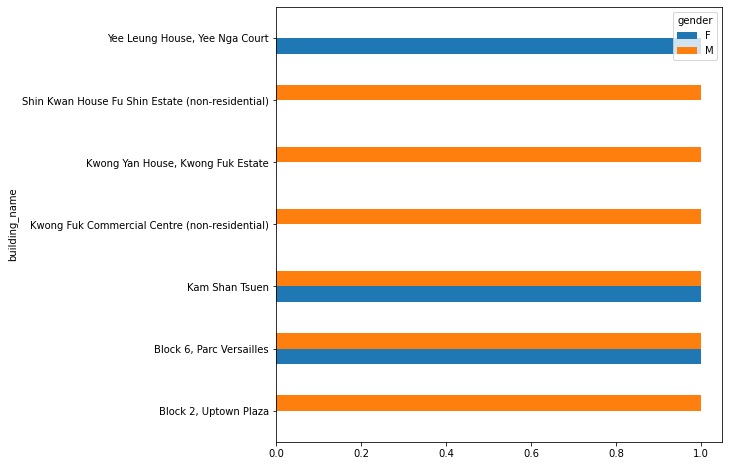

In [84]:
# Data Exploratory and Visualization. Group by gender & hk_nonhk_resident and count number of cases 
# and then present in bar chart.
pd.crosstab(tai_po_14_unique['building_name'],tai_po_14_unique['gender']).plot.barh(figsize=(8,8))